In [6]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Define paths
data_dir = "/home/rguktongole/Desktop/TEACHNOOK/archive/8863"
categories = ['0', '1']



2024-08-11 21:44:05.954715: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-11 21:44:07.634959: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-11 21:44:08.425735: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-11 21:44:09.198415: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-11 21:44:09.410356: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-11 21:44:12.099205: I tensorflow/core/platform/cpu_feature_gu

In [8]:
# Load the data
def load_data(data_dir, categories, img_size=50):
    data = []
    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_img = cv2.resize(img_array, (img_size, img_size))
                data.append([resized_img, class_num])
            except Exception as e:
                pass
    return data



In [10]:
data = load_data(data_dir, categories)



In [12]:
np.random.shuffle(data)



In [14]:
# Prepare features and labels
X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)



In [16]:
# Convert to numpy array and reshape
X = np.array(X).reshape(-1, 50, 50, 1)
X = X / 255.0  # Normalize

y = np.array(y)
y = to_categorical(y, num_classes=2)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout



In [20]:
model = Sequential()



In [22]:
# First Convolutional Layer
model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))



/home/rguktongole/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
# Second Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))



In [26]:
# Third Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))



In [28]:
#Flatten the layers
model.add(Flatten())


In [30]:

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))



In [32]:
# Output layer
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 363,330 (1.39 MB)

 Trainable params: 363,330 (1.39 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 202ms/step - accuracy: 0.7321 - loss: 0.5514 - val_accuracy: 0.7325 - val_loss: 0.5384
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 156ms/step - accuracy: 0.7878 - loss: 0.4800 - val_accuracy: 0.7325 - val_loss: 0.5301
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 194ms/step - accuracy: 0.8179 - loss: 0.4181 - val_accuracy: 0.7325 - val_loss: 0.4204
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 180ms/step - accuracy: 0.8022 - loss: 0.3664 - val_accuracy: 0.7325 - val_loss: 0.3645
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 155ms/step - accuracy: 0.8142 - loss: 0.3293 - val_accuracy: 0.7325 - val_loss: 0.3653
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 152ms/step - accuracy: 0.8150 - loss: 0.3193 - val_accuracy: 0.7325 - val_loss: 0.4261
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - accuracy: 0.7878 - loss: 0.4059 - val_accuracy: 0.7325 - val_loss: 0.3377
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step - accuracy: 0.8278 - loss: 0.2940 - val_accuracy: 0

In [36]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy: {:.2f}%".format(test_acc * 100))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8216 - loss: 0.3115
Test Accuracy: 78.57%


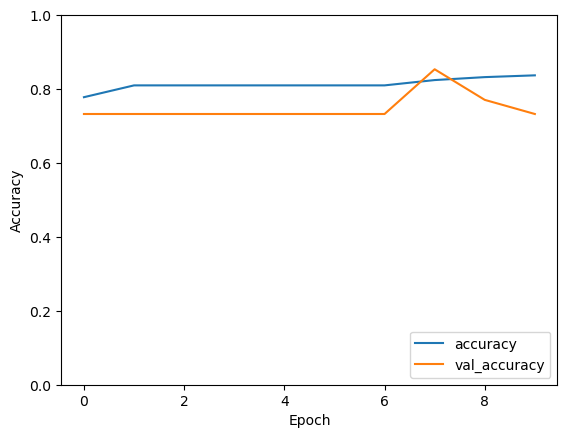

In [38]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
